# Chapter 5 Simplifications

In [1]:
from sympy import *
x, y, z = symbols('x, y, z')
init_printing(use_unicode=True)

## 5.1 単純化

`sympy`のどんな数式も`simplify()`で簡単な形にできる！:

In [2]:
simplify(sin(x)**2 + cos(x)**2)

In [3]:
simplify((x**3 + x**2 - x - 1) / (x**2 + 2*x + 1))

In [4]:
simplify(gamma(x) / gamma(x-2)) #ガンマ関数(特殊関数)

#### 注意点:その1

In [5]:
simplify(x**2 + 2*x + 1)

---> **因数分解できない!!!** 因数分解は`factor()`関数を使う:

In [6]:
factor(x**2 + 2*x + 1)

#### 注意点:その2

`simplify()`は遅い！

#### 解決策

- `simplify()`は「ある程度」簡単な形にまでしか変形できないので、確実に式を簡単にしたいなら、その用途に応じた適切な関数を使うべき! 

- インタラクティブシェルで`simplify`の挙動を見てから**個別の関数**(以下) を使って簡単にしよう.

## 5.2 多項式 / 有理式

### 5.2.1 `expand`関数

多項式を展開し、必要ならば項をキャンセルする.

In [7]:
expand((x + 1)**2)

In [8]:
expand((x + 2)*(x - 3))

「式を展開する」ことで「式が簡単になる」ことがある。

In [9]:
expand((x + 1)*(x - 2) - (x - 1)*x) #式がキャンセルし合う

### 5.2.2 `factor`関数

数式を可能な限り因数分解する

In [10]:
factor(x**3 - x**2 + x - 1)

In [11]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

In [12]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z) #(変数or定数, べき)

#### 三角関数程度の式なら、関数`factor`, `expand`で対応可能

In [13]:
expand((cos(x) + sin(x))**2)

In [14]:
factor(cos(x)**2 + 2*cos(x)*sin(x) + sin(x)**2)

### 5.2.3 `collect`関数

特定の変数でまとめたり、特定次の係数を取り出す.

In [15]:
expr = x*y + x -3 + 2*x**2 - z*x**2 + x**3

In [16]:
expr

In [17]:
collected_expr = collect(expr, x) #xでまとめる.

In [18]:
collected_expr

さらに以下のようにcoeffメソッドで特定次を取り出せる.

In [19]:
collected_expr.coeff(x, 2) #xの2次だけ取り出す.

### 5.2.4 `cancel`関数

有理式を簡単にする

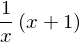

In [20]:
cancel((x**2 + 2*x + 1) / (x**2 + x)) 

In [21]:
expr = 1/x + (2*x/2 - 2) /(x - 4) 

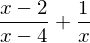

In [22]:
expr

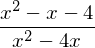

In [23]:
cancel(expr) #分母を通分する

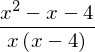

In [24]:
factor(expr) #factorも同じような操作をする.

In [25]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2) / (x**2 - 1)

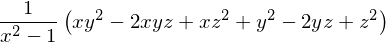

In [26]:
expr

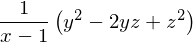

In [27]:
cancel(expr)

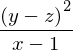

In [28]:
factor(expr) #factorも同じような変形をする.

**コメント**

式を単にキャンセルさせてシンプルにさせたいときは、`factor()`より`cancel()`のほうが効率的

### 5.2.5 `apart`関数

有理式(分数)を部分分数分解する

In [29]:
x = symbols('x')
expr = (4*x**3 + 21*x**2 + 10*x + 12) / (x**4 + 5*x**3 + 5*x**2 + 4*x)

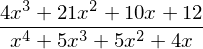

In [30]:
expr

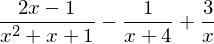

In [31]:
apart(expr)

## 5.3 三角関数

**コメント**: 逆三角関数は頭に"a"を付ける: acos, asin, atan, etc...

In [32]:
acos(x)

In [33]:
cos(acos(x))

In [34]:
asin(1)

### 5.3.1 `trigsimp`関数

三角関数の表式を、公式を用いて可能な限りシンプルな形にする.

In [35]:
trigsimp(sin(x)**2 + cos(x)**2)

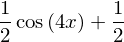

In [36]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [37]:
trigsimp(sin(x)*tan(x)/sec(x))

In [38]:
trigsimp(cosh(x)**2-sinh(x)**2)

### 5.3.2 `expand_trig`関数

三角関数の式を展開する。 `trigsimp`と`expand_trig`は完全に逆の操作をする

In [39]:
expand_trig(sin(x + y))

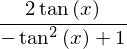

In [40]:
expand_trig(tan(2*x))

## 5.4 べき乗

In [41]:
x, y = symbols('x y', positive=True) #変数が正であると仮定

In [42]:
a, b = symbols('a, b', real = True) #変数が実数であると仮定

In [43]:
z, t, c = symbols('z t c')

**コメント**: `sqrt(x)`と`x**Rational(1,2)`, `x**0.5`, `x**(1/2)`は同じ

In [44]:
sqrt(x)

In [45]:
x**Rational(1,2)

In [46]:
x**(0.5)

In [47]:
x**(1/2)

### 5.4.1 `powsimp` 関数

冪が変数(`Sympy`シンボル)のときに限り、シンプルな形にする

In [48]:
powsimp(x**a*x**b) #これ以上簡単にできない.

In [49]:
powsimp(x**a*y**a)

変数の仮定にかかわらず実行させたいとき:

In [50]:
powsimp(t**c*z**c)

を

In [51]:
powsimp(t**c*z**c, force=True)

とする. `t` もしくは `z` が負になっても強制的にこの変形は行われる.

In [52]:
(z*t)**2 #冪が整数、有理数, 2のとき.

In [53]:
sqrt(x*y) #同じ

**注意** このような式に対しては`powsimp`は使えない:

In [54]:
powsimp(z**2*t**2) #指数が整数

In [55]:
sqrt(x*y)

--->冪が変数のときに`powsimp`で簡単にできる.

### 5.4.2 `expand_power_expr`関数, `expand_power_base`関数

べき乗を展開する. `powsimp`関数と逆の操作

In [56]:
expand_power_exp(x**(a + b))

In [57]:
expand_power_base((x*y)**a)

**注意** これも`powsimp()`と同様で、変形できないときは元の式を返す:

In [58]:
expand_power_base((z*t)**c)

`t*z`が正という条件を`symbols`でつけていれば展開できるが、
今回のようにそうと限らないときは展開してくれない. 強制的に行うには

In [59]:
expand_power_base((z*t)**c, force=True)

とする. また冪が数のときは

In [60]:
x**2*x**3

In [61]:
expand_power_exp(x**5)

のように変形できない。

### 5.4.3 `powdenest`関数

べき乗のべき乗を展開

In [62]:
(x**a)**b #カッコを外して展開

In [63]:
powdenest((x**a)**b)

In [64]:
powdenest((z**a)**b)

In [65]:
powdenest((z**a)**b, force=True)

## 5.5 指数関数、対数関数

In [66]:
ln(x) #ln(x)とlog(x)は同じ.

In [67]:
log(x)

In [68]:
x, y = symbols('x y', positive=True)

In [69]:
n = symbols('n', real=True)

### 5.5.1 `expand_log`関数

対数関数を展開する

In [70]:
expand_log(log(x*y))

In [71]:
expand_log(log(x/y))

In [72]:
expand_log(log(x**2))

In [73]:
expand_log(log(x**n))

In [74]:
expand_log(log(z*t))

**注意** これまでと同様にして、正でない変数は展開できないので、そのときは`Force=True`オプションを付ける。

In [75]:
expand_log(log(z**2))

In [76]:
expand_log(log(z**2), force=True)

### 5.5.2 `logcombine`関数

対数関数をシンプルにする.

In [77]:
logcombine(log(x) + log(y)) #対数関数を簡単にする

In [78]:
logcombine(n*log(x))

In [79]:
logcombine(n*log(z))

In [80]:
logcombine(n*log(z), force=True)

## 5.6 特殊関数

In [81]:
x, y, z = symbols('x y z')

In [82]:
k, m, n = symbols('k m n')

### 5.6.1 階乗

In [83]:
factorial(n)

In [84]:
factorial(10)

### 5.6.2 組み合わせ (Combination)

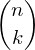

In [85]:
binomial(n, k) #nCk

In [86]:
combsimp(factorial(n) / factorial(n - 3)) #シンプルにする

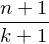

In [87]:
combsimp(binomial(n + 1, k + 1) / binomial(n, k))

### 5.6.3 ガンマ関数

In [88]:
gamma(z)

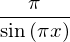

In [89]:
combsimp(gamma(x)*gamma(1 - x)) #ガンマ関数にも使える

### 5.6.4 一般化された超幾何関数

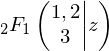

In [90]:
hyper([1, 2], [3], z)

### 5.6.5 関数を別の関数で書き換える

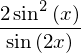

In [91]:
tan(x).rewrite(sin) #tanをsinで書き換える

In [92]:
factorial(x).rewrite(gamma) #階乗をガンマ関数で書き換える

### 5.6.6 特殊関数をいくつかの恒等式で書き換える

In [93]:
expand_func(gamma(x + 3))